In [48]:
#importing the data science library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [49]:
#importing the deep learning libraries

from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img, array_to_img

In [50]:
#declearing the image size and providing the data path

IMAGE_SIZE = [224, 224]
train_dir = r'C:\Users\DELL\Desktop\python project\Deep Learning\Potato Leaf Disease\Dataset\Training'
valid_dir = r'C:\Users\DELL\Desktop\python project\Deep Learning\Potato Leaf Disease\Dataset\Validation'

In [51]:
#making the inception laye

inception = InceptionV3(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE + [3])

In [52]:
inception

In [53]:
for layer in inception.layers:
    layer.trainable = False

In [54]:
#will be used as output layes 

folder = glob(r'C:\Users\DELL\Desktop\python project\Deep Learning\Potato Leaf Disease\Dataset\Training\*')

In [55]:
folder

['C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Potato Leaf Disease\\Dataset\\Training\\Early_Blight',
 'C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Potato Leaf Disease\\Dataset\\Training\\Healthy',
 'C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Potato Leaf Disease\\Dataset\\Training\\Late_Blight']

In [56]:
#flattening the output of inception model

x = Flatten()(inception.output)

In [57]:
x

<KerasTensor: shape=(None, 51200) dtype=float32 (created by layer 'flatten_1')>

In [58]:
#predicting

prediction = Dense(len(folder), activation = 'softmax')(x)

In [59]:
prediction

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_1')>

In [60]:
#creating the model

model = Model(inputs = inception.input, outputs = prediction)

In [61]:
model

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [72]:
#compiling the model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
#generating the train iamge data 

train_data_generator = ImageDataGenerator(rescale = 1./225, 
                                          shear_range = 0.2, 
                                          horizontal_flip = True,
                                          zoom_range = 0.2)
#generating the test image data

test_data_generator = ImageDataGenerator(rescale = 1./225)

In [74]:
training_set = train_data_generator.flow_from_directory(r'C:\Users\DELL\Desktop\python project\Deep Learning\Potato Leaf Disease\Dataset\Training',
                                                        target_size = (224, 224),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 3251 images belonging to 3 classes.


In [75]:
testing_set = test_data_generator.flow_from_directory(r'C:\Users\DELL\Desktop\python project\Deep Learning\Potato Leaf Disease\Dataset\Validation',
                                                      target_size = (224, 224),
                                                      batch_size = 32,
                                                      class_mode = 'categorical')

Found 416 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

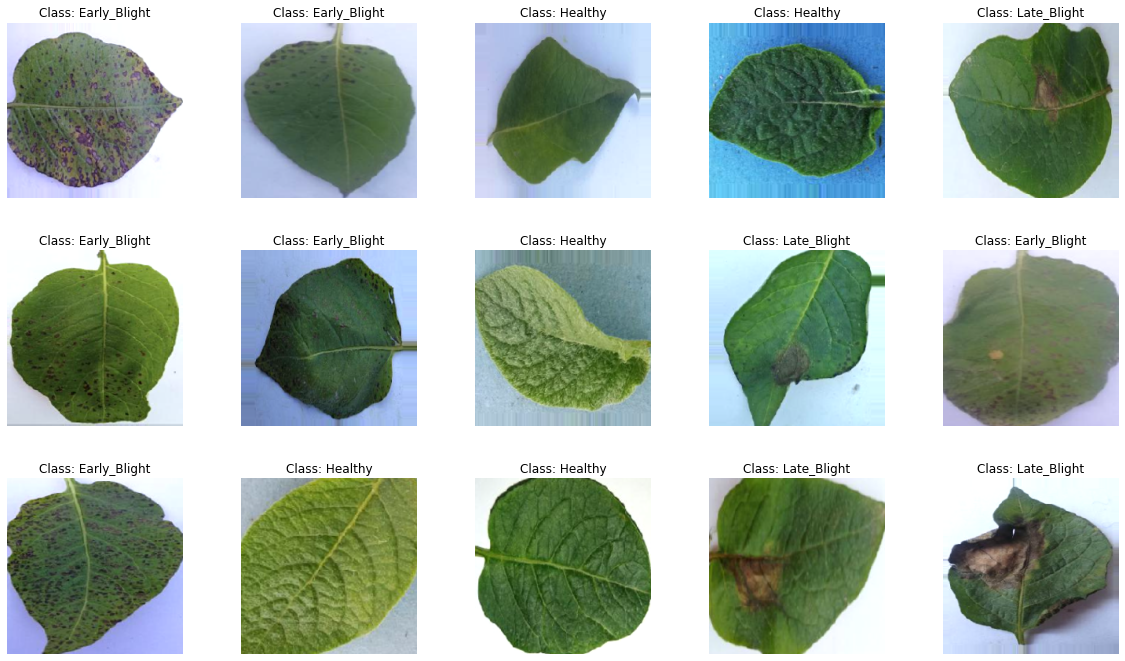

In [79]:
#visualizing the images along with their classification

labels = [k for k in training_set.class_indices]
sample_generate = training_set.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [76]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [77]:
history = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set),
    callbacks=[early]
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11780\1796370892.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
102/102 [==============================] - 672s 6s/step - loss: 1.6299 - accuracy: 0.7819 - val_loss: 0.3617 - val_accuracy: 0.9014
Epoch 2/30
102/102 [==============================] - 695s 7s/step - loss: 0.6219 - accuracy: 0.8770 - val_loss: 0.6109 - val_accuracy: 0.8702
Epoch 3/30
102/102 [==============================] - 635s 6s/step - loss: 0.6654 - accuracy: 0.8828 - val_loss: 0.4989 - val_accuracy: 0.8918
Epoch 4/30
102/102 [==============================] - 647s 6s/step - loss: 0.4727 - accuracy: 0.9096 - val_loss: 0.4564 - val_accuracy: 0.9135
Epoch 5/30
102/102 [==============================] - 634s 6s/step - loss: 0.4371 - accuracy: 0.9145 - val_loss: 0.6029 - val_accuracy: 0.8822
Epoch 6/30
102/102 [==============================] - 604s 6s/step - loss: 0.5865 - accuracy: 0.9068 - val_loss: 0.4930 - val_accuracy: 0.9111


In [80]:
from tensorflow.keras.models import load_model
model.save('model_inceptionV3.h5')

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


<Figure size 432x288 with 0 Axes>

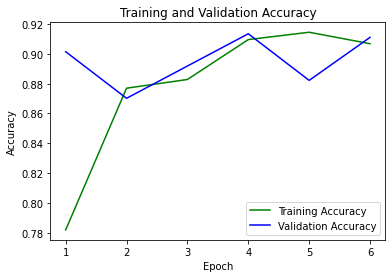

<Figure size 432x288 with 0 Axes>

In [82]:
# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

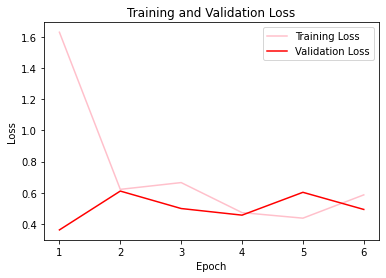

In [83]:
# Loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

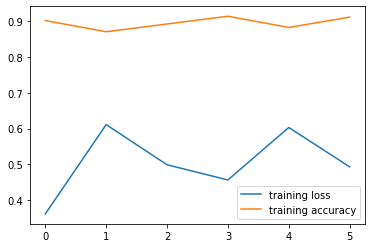

In [84]:
#visualizing the validation loo and validation accuracy graph

plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()